In [1]:
import warnings
# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("tweet_data.csv", encoding="ISO-8859-1")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [5]:
# Viewing the first few entries
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [6]:
# Checking to see if there are any null values
data.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7485
user_timezone             7798
dtype: int64

In [7]:
# Fetching for a statistics summary of the data
data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [8]:
# Dropping unnecessary columns
columns_to_drop = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 'created', 'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage', 'sidebar_color', 'tweet_coord', 'tweet_id', 'user_timezone']

data = data.drop(columns=columns_to_drop)

In [9]:
data.info()

,gender,description,fav_number,retweet_count,text,tweet_count,tweet_created,tweet_location
0,male,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,main; @Kan1shk3
1,male,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,NaN
2,male,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,clcncl
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,"Palo Alto, CA"
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,NaN
...,...,...,...,...,...,...,...,...
20045,female,(rp),302,0,"@lookupondeath ...Fine, and I'll drink tea too...",783,10/26/15 13:20,Verona ªÁ
20046,male,"Whatever you like, it's not a problem at all. ...",2513,0,Greg Hardy you a good player and all but don't...,13523,10/26/15 12:40,"Kansas City, MO"
20047,male,#TeamBarcelona ..You look lost so you should f...,50,0,You can miss people and still never want to se...,26419,10/26/15 13:20,Lagos Nigeria
20048,female,Anti-statist; I homeschool my kids. Aspiring t...,70804,0,@bitemyapp i had noticed your tendency to pee ...,56073,10/26/15 12:40,Texas Hill Country


In [10]:
# Filling columns containing null values with 'None'
null_column = ['gender', 'description', 'tweet_location']
data[null_column] = data[null_column].fillna('None')

# Discoverd that the gender column contains 'unknown' so replacing with 'None' as it seems to be equivalent to being undecided/None set
# Replacing 'unknown' with 'None' in the 'gender' column
data['gender'].replace('unknown', 'None', inplace=True)

In [11]:
# Making sure all is good
data.isnull().sum()

gender            0
description       0
fav_number        0
retweet_count     0
text              0
tweet_count       0
tweet_created     0
tweet_location    0
dtype: int64

In [12]:
# Checking what we're left with
data.head()

,gender,description,fav_number,retweet_count,text,tweet_count,tweet_created,tweet_location
0,male,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,main; @Kan1shk3
1,male,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,None
2,male,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,clcncl
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,"Palo Alto, CA"
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,None


In [ ]:
# Here we do some NLP using the NLTK library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize         # Word tokenization rather than sentences
from nltk.stem import PorterStemmer             # For stemming the words
import string

# Downloading the resources
nltk.download('punkt')
nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))    # Set of English stopwords
punctuation = set(string.punctuation)           # Set of punctuation chars

# Function for text preprocessing
def preprocess_text(text):
    # Converting text to lowercase to ensure consistency
    text = text.lower()
    
    # Tokenizing text
    tokens = word_tokenize(text)
   
    # Removing punctuation
    tokens = [word for word in tokens if word not in punctuation]
    
    # Removeing the stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the preprocessing to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

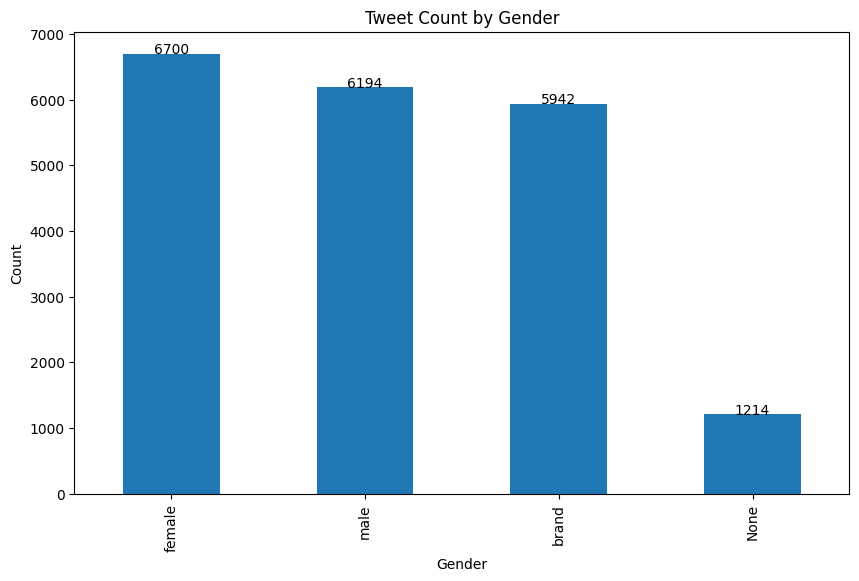

In [14]:
import matplotlib.pyplot as plt

# Plotting tweet count by gender
plt.figure(figsize=(10, 6))
gender_counts = data['gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Tweet Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding the num of tweet per column label
for i, count in enumerate(gender_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()

In [15]:
# Extracting hour of tweet creation
data['tweet_created'] = pd.to_datetime(data['tweet_created'])       # Converting the column to datetime format
data['hour_of_day'] = data['tweet_created'].dt.hour                 # Creating a column 'hour_of_day' to display the hour of when tweet was created

# Performing sentiment analysis (to track neg. & pos. sentiment expressed in each tweet)
from textblob import TextBlob

data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

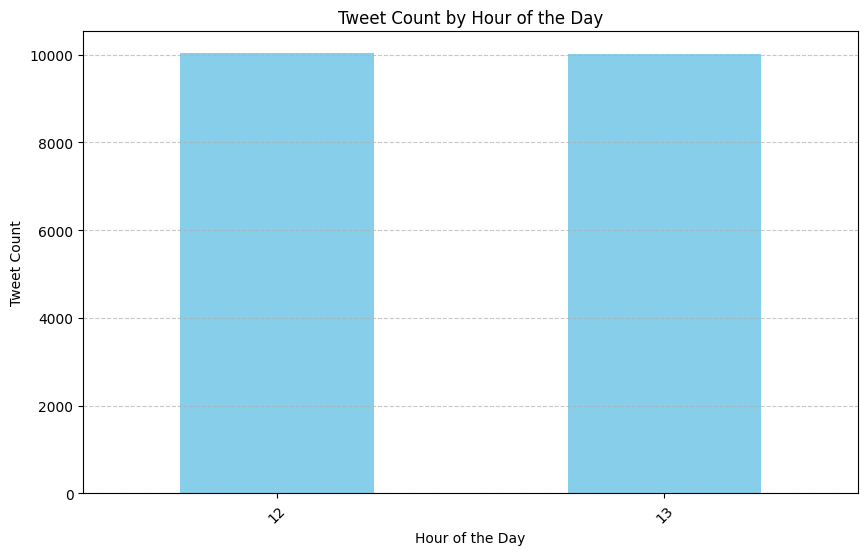

In [16]:
import matplotlib.pyplot as plt

# Grouping data by hour_of_day and counting the number of tweets for each hour
hourly_tweet_counts = data['hour_of_day'].value_counts().sort_index()

# Plotting tweet count by hour of the day
plt.figure(figsize=(10, 6))
hourly_tweet_counts.plot(kind='bar', color='skyblue')
plt.title('Tweet Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines
plt.show()

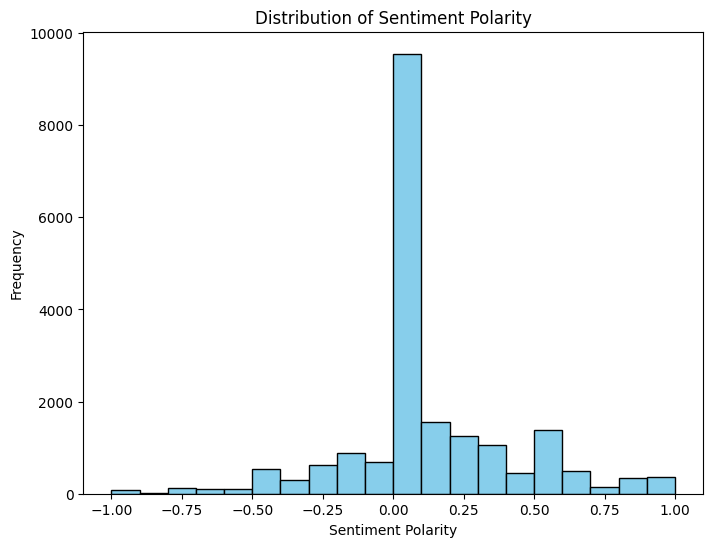

In [17]:
import matplotlib.pyplot as plt

# Visualizing sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(data['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [25]:
'''
#Try and write an algorithm where the system can detect trends or patterns based on tweets
import re
from collections import Counter

def extract_words(tweet):

    words = re.findall(r'\b\w+\b', tweet.lower())
    return words

def detect_trends(tweets, threshold=3):

    all_words = []
    for tweet in tweets:
        words = extract_words(tweet)
        all_words.extend(words)

    word_counts = Counter(all_words)
    trending_words = [(word, count) for word, count in word_counts.items() if count >= threshold]

    return trending_words
'''


In [21]:
'''
# Example usage:
if __name__ == "__main__":
    tweets = [
        "I love coding and algorithms!",
        "Python is the best programming language.",
        "Machine learning is changing the world.",
        "Data science is in demand.",
        "AI and robotics are the future.",
        "I enjoy reading books and learning new things.",
        "Python is great for data analysis.",
        "Artificial intelligence is revolutionizing industries.",
        "Data is the new oil.",
        "Big data brings big opportunities."
    ]

    trends = detect_trends(tweets)
    if trends:
        print("Trending words:")
        for trend in trends:
            print(f"{trend[0]}: {trend[1]}")
    else:
        print("No trends found.")
'''

Trending words:
and: 3
is: 6
the: 4
data: 4


In [28]:
import pandas as pd
import re
from collections import Counter

def extract_words(tweet):
    """
    Extract words from a tweet.
    """
    words = re.findall(r'\b\w+\b', str(tweet).lower())
    return words

def detect_trends(tweets, threshold=3):
    """
    Detect trends or patterns based on tweets.

    Args:
    - tweets: List of tweets (strings).
    - threshold: Minimum count for a word to be considered a trend.

    Returns:
    - List of tuples containing trending words and their counts.
    """
    all_words = []
    for tweet in tweets:
        words = extract_words(tweet)
        all_words.extend(words)

    word_counts = Counter(all_words)
    trending_words = [(word, count) for word, count in word_counts.items() if count >= threshold]

    return trending_words

# Read data from CSV
data = pd.read_csv("tweet_data.csv", encoding="ISO-8859-1")

# Convert the 'description' column to strings and extract tweets
tweets = data['description'].apply(str).tolist()



In [29]:
# Example usage:
if __name__ == "__main__":
    trends = detect_trends(tweets)
    if trends:
        print("Trending words:")
        for trend in trends:
            print(f"{trend[0]}: {trend[1]}")
    else:
        print("No trends found.")


Trending words:
i: 4156
sing: 22
my: 2002
own: 233
m: 875
the: 5248
author: 186
of: 3576
novels: 14
filled: 7
with: 1084
family: 196
drama: 19
and: 5393
romance: 23
louis: 38
all: 918
mobile: 49
guy: 94
49ers: 12
google: 52
yahoo: 19
sprint: 3
pcs: 3
air: 32
force: 16
stanford: 6
dad: 107
husband: 128
brother: 32
golfer: 9
ricky: 5
wilson: 6
best: 345
chiefs: 9
band: 41
xxxx: 3
thank: 30
you: 1937
for: 2484
an: 403
incredible: 11
year: 114
gigs: 4
memories: 9
to: 3133
cherish: 3
always: 224
don: 353
t: 2247
know: 222
me: 1087
a: 3638
global: 66
marketplace: 9
images: 17
videos: 82
music: 549
sharing: 32
photos: 31
inspiration: 35
design: 127
tips: 68
creative: 74
community: 121
secret: 55
getting: 33
ahead: 8
is: 1898
started: 27
pll: 4
fan: 483
crazy: 55
about: 541
bae: 33
renaissance: 5
art: 164
historian: 18
university: 166
nottingham: 7
by: 624
coffee: 91
soft: 8
spot: 8
china: 9
national: 55
teaching: 19
fellow: 20
clean: 13
food: 183
that: 728
tastes: 7
great: 159
while: 74
provi

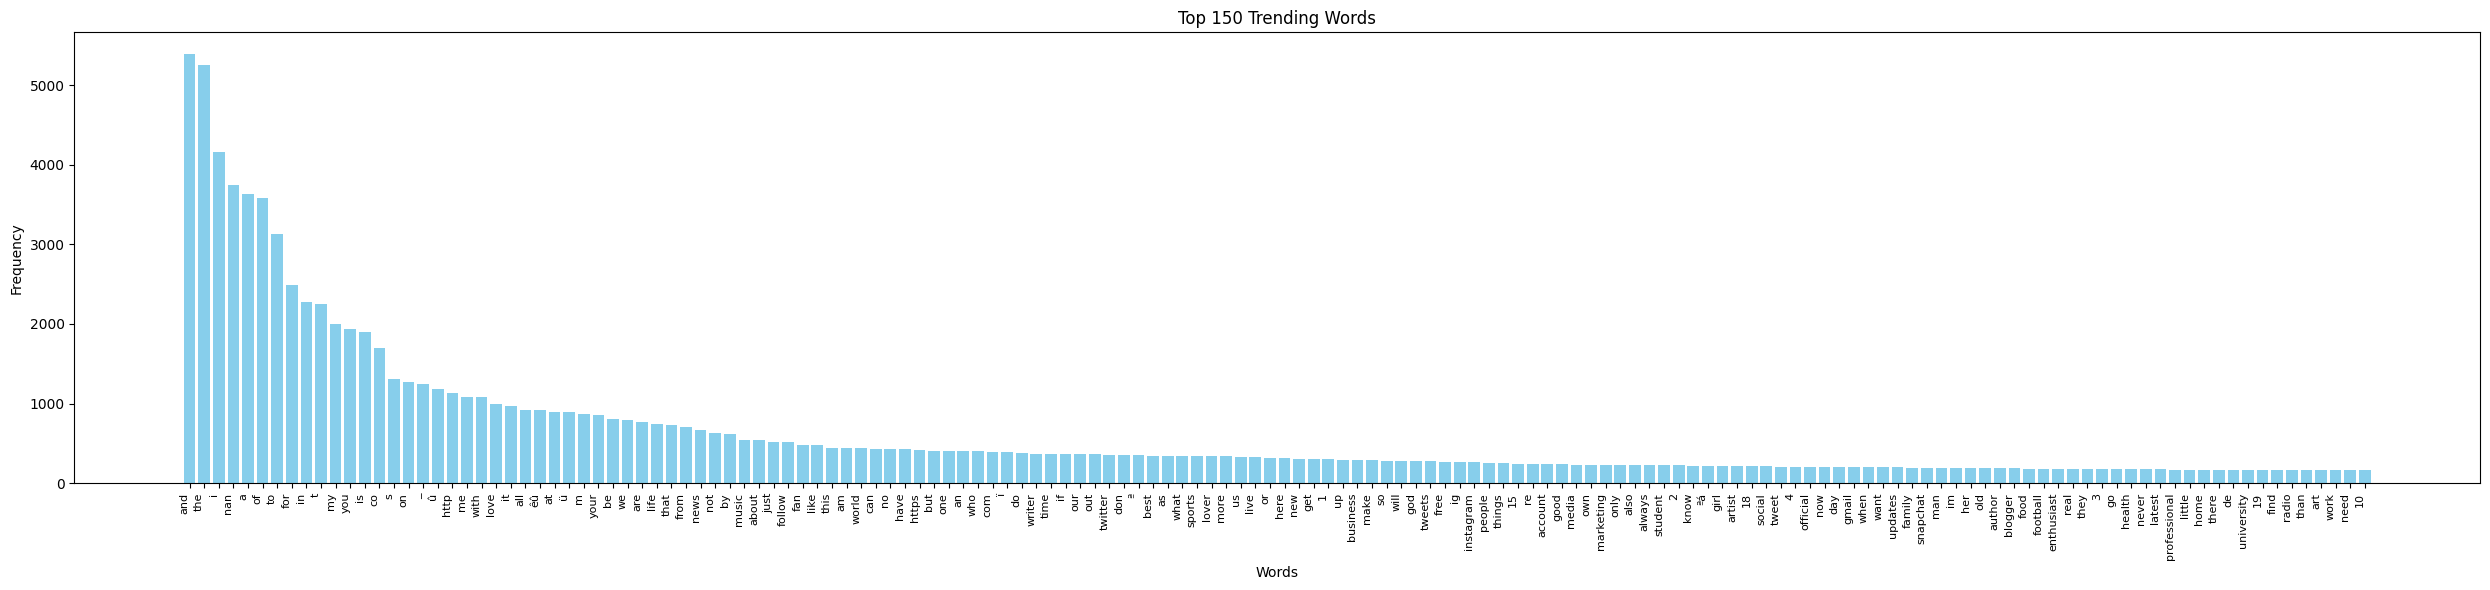

In [44]:
# Plot the top 500 trending words
if trends:
    trends_sorted = sorted(trends, key=lambda x: x[1], reverse=True)[:150]
    words, counts = zip(*trends_sorted)
    plt.figure(figsize=(25, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 150 Trending Words')
    plt.xticks(rotation=90, ha='right', size = 8)
    plt.tight_layout()
    plt.show()
else:
    print("No trends found.")
